In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv


# importing datasets

In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df2 = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

print(df.shape)
print(df2.shape)

(42000, 785)
(28000, 784)


In [3]:
x = df.drop('label',axis=1)
y = df.label

print(x.shape)
print(y.shape)

(42000, 784)
(42000,)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x = scaler.fit_transform(x)
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
x = x.reshape((42000,28,28,1))
x.shape

(42000, 28, 28, 1)

In [6]:
x1 = np.array(df2)
x1 = scaler.fit_transform(x1)
x1 = x1.reshape((28000,28,28,1))
x1.shape


(28000, 28, 28, 1)

In [7]:
y = np.array(y)

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
y= y.reshape((-1,1))
y = enc.fit_transform(y)

y.shape

(42000, 10)

# Test train split from training data

In [8]:
from sklearn.model_selection import train_test_split as tts

x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33600, 28, 28, 1)
(33600, 10)
(8400, 28, 28, 1)
(8400, 10)


# creating model for prediction

In [9]:
# importing required librery and moduls

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [10]:
model = keras.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [11]:
# setting for early stopping

from tensorflow import keras

callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor='val_loss',
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-5,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=25,
        verbose=1)
]

Epoch 1/500
657/657 [==============================] - 4s 6ms/step - loss: 0.3166 - accuracy: 0.8985 - val_loss: 0.0599 - val_accuracy: 0.9823
Epoch 2/500
657/657 [==============================] - 4s 6ms/step - loss: 0.0925 - accuracy: 0.9737 - val_loss: 0.0344 - val_accuracy: 0.9888
Epoch 3/500
657/657 [==============================] - 4s 5ms/step - loss: 0.0690 - accuracy: 0.9804 - val_loss: 0.0291 - val_accuracy: 0.9901
Epoch 4/500
657/657 [==============================] - 4s 5ms/step - loss: 0.0574 - accuracy: 0.9839 - val_loss: 0.0188 - val_accuracy: 0.9940
Epoch 5/500
657/657 [==============================] - 4s 6ms/step - loss: 0.0493 - accuracy: 0.9862 - val_loss: 0.0143 - val_accuracy: 0.9960
Epoch 6/500
657/657 [==============================] - 4s 6ms/step - loss: 0.0446 - accuracy: 0.9873 - val_loss: 0.0157 - val_accuracy: 0.9955
Epoch 7/500
657/657 [==============================] - 4s 6ms/step - loss: 0.0426 - accuracy: 0.9879 - val_loss: 0.0139 - val_accuracy: 0.9963

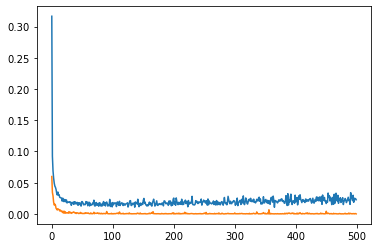

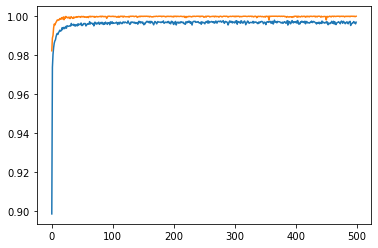

In [12]:
model.compile(optimizer='adam', loss="categorical_crossentropy",metrics=["accuracy"])

history = model.fit(x,y,batch_size=64,epochs=500,validation_data=(x_test,y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.figure()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [13]:
predictions=model.predict(x1)
pre=predictions.argmax(axis=-1)

In [14]:
submission = pd.Series(pre,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),submission],axis = 1)
submission.to_csv("final_submission_v1.csv",index=False)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


# END!!!!!!!!!!!!!!!!!!!!!!!